# How does the number of sample error the measurement and the error predicted by the SVD

In [174]:
from scripts import * 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

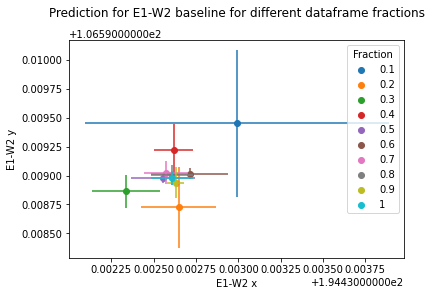

In [180]:
# take only the data from April 7th

l = []

i = True

fracs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

colour = [frac/max(fracs) for frac in fracs]

for frac in fracs:
    
        df = pd.read_csv('data/2019_04_07.csv')

        df = df.sample(frac=frac)

        design_mat, pinv, y, beta = create_design_mat(df)
        sigma = svd_uncertainty(design_mat, y, beta)
        
        if sigma[0] < 0.1:

            l.append((sigma[0],sigma[1]))
            plt.scatter(beta[0], beta[1], label=f'{frac}')
            plt.errorbar(beta[0], beta[1], xerr=sigma[0], yerr=sigma[1])

plt.legend(title='Fraction')
plt.xlabel('E1-W2 x')
plt.ylabel('E1-W2 y')
plt.title('Prediction for E1-W2 baseline for different dataframe fractions', y=1.08)
plt.savefig('figures/different-sampling-fracs2.png', dpi=600, bbox_inches="tight")

In [50]:
'''
So it is seen that as expected the error about the 'truest' value increases as the fraction decreases.

The SVD errors mean that 0.1 IS NOT statistically significant 

This causes errors on the scale of a couple of mm 


But usually the SVD errors grow accordingly meaning that changes are still significant 
'''

"\nSo it is seen that as expected the error about the 'truest' value increases as the fraction decreases.\n\nThe SVD errors mean that 0.1 IS NOT statistically significant \n\nThis causes errors on the scale of a couple of mm \n"

In [103]:
df = pd.read_csv('data/2019_04_07.csv')

df = df.sample(frac=0.1)

design_mat, pinv, y, beta = create_design_mat(df)
sigma = svd_uncertainty(design_mat, y, beta)

sigma

array([5.67610454e+04, 9.13564461e+02, 1.30180802e+04, 3.83466967e+05,
       3.04656264e+05, 3.01453839e+05, 1.04155496e+06, 2.35390083e+05,
       3.03322417e+06, 5.29724283e+05, 1.05345529e+06, 1.33939762e+06,
       7.40816245e+05, 1.00585970e+05, 2.82586382e+06, 1.31598845e+05,
       2.03374224e+05, 4.12800806e+05, 3.58273956e+05, 2.44350924e+05,
       5.58407712e+03, 3.31484879e+05, 6.08931277e+05, 6.22288468e+05,
       3.23186455e+05, 2.73227375e+04, 6.40092488e+04, 3.48927406e+05,
       3.73204420e+05, 1.93270374e+06, 3.26723978e+06, 1.44233852e+06,
       1.54443165e+06])

In [129]:
dftest = df

In [104]:
U, w, Vt = np.linalg.svd(design_mat)

w

array([1.54433231e+01, 1.34537433e+01, 1.00630619e+01, 7.10522546e+00,
       5.81572873e+00, 5.10903204e+00, 4.59278463e+00, 4.18458162e+00,
       3.82889805e+00, 3.71443429e+00, 3.55059025e+00, 3.26470540e+00,
       2.96144440e+00, 2.58670527e+00, 2.30199618e+00, 1.67191904e+00,
       1.60185148e+00, 1.47006015e+00, 1.09931093e+00, 1.07698459e+00,
       9.15543003e-01, 6.54469355e-01, 5.18908989e-01, 4.21126606e-01,
       2.39283373e-01, 2.09263270e-01, 1.26783026e-01, 1.09296836e-01,
       7.63866082e-02, 1.34288927e-02, 3.43570641e-03, 2.60309256e-11,
       1.01847630e-15])

In [110]:
np.finfo(type(w[0])).eps * w[0] * design_mat.shape[0]

6.961086367332343e-13

In [111]:
Vt[-2]

array([ 7.39888367e-13, -9.00190104e-13, -4.43370280e-13,  8.48258369e-13,
       -7.52363835e-13,  9.89304070e-13, -6.51654050e-13,  2.01437060e-12,
       -1.73312570e-12, -2.36598168e-13,  1.09617779e-12, -9.26607055e-13,
        2.96416945e-08,  7.95806324e-01,  5.41358536e-01, -3.88971835e-03,
       -3.88971835e-03, -3.88971835e-03, -3.88971835e-03, -3.88971835e-03,
       -3.88971835e-03, -3.88971835e-03, -3.88971835e-03, -3.88971835e-03,
       -3.88971834e-03, -3.88971834e-03, -3.88971834e-03, -3.88971835e-03,
       -3.88971834e-03, -3.88971834e-03, -3.88971834e-03,  2.20121363e-01,
       -1.57885203e-01])

In [125]:
Vt[-2][-1]/Vt[-2][-2] 

-0.7172643374918916

In [128]:
Vt[-2][14]/Vt[-2][13]

0.6802641800422123

/Users/harryshaw/Desktop/coding-projects/computing-project/scripts.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  design matrix for the dataframe
/Users/harryshaw/Desktop/coding-projects/computing-project/scripts.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pinv: numpy.ndarray


NameError: name 'plt' is not defined

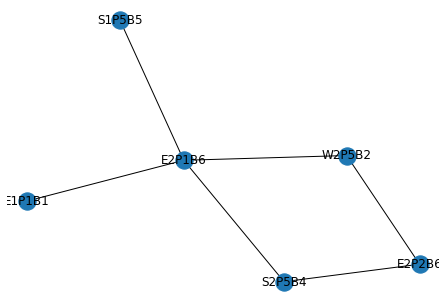

In [118]:
plot_graph(df[(df.tel_1 == 'E2') | (df.tel_2 == 'E2')])

NameError: name 'plt' is not defined

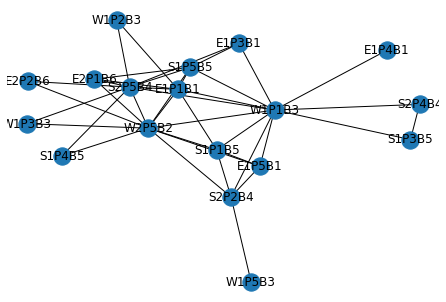

In [117]:
plot_graph(df)

In [173]:
df

,utc,star,azimuth,elevation,tel_1,tel_2,pop_1,pop_2,cart_1,cart_2,year,month,day
1357,2019-04-07T08:41:52.000,#184873,2.289932,0.581336,S2,E1,P5B4,P3B1,72.007693,22.769235,2019,4,7
1390,2019-04-07T08:41:59.000,#184873,2.290402,0.581653,S2,W1,P5B4,P1B3,72.012939,13.573989,2019,4,7
1899,2019-04-07T10:26:23.000,#242858,1.167161,0.812628,S1,W2,P1B5,P5B2,41.691319,59.999998,2019,4,7
1613,2019-04-07T09:12:36.000,#192515,2.132703,0.680911,S2,W1,P5B4,P1B3,51.210819,11.907411,2019,4,7
1302,2019-04-07T08:13:52.000,#175132,2.505704,0.551721,S2,E1,P5B4,P1B1,86.529018,57.780034,2019,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,2019-04-07T07:32:30.000,#164437,2.609243,0.643167,S2,E1,P5B4,P1B1,54.943184,11.469510,2019,4,7
71,2019-04-07T04:37:26.000,#66519,5.141817,0.757599,E1,W1,P1B1,P5B3,2.256139,87.098953,2019,4,7
1100,2019-04-07T07:46:28.000,#170617,2.426211,0.658506,S2,E1,P5B4,P1B1,58.754387,55.142757,2019,4,7
1550,2019-04-07T09:04:43.000,#192515,2.101593,0.656544,S2,W2,P5B4,P5B2,50.672810,59.999998,2019,4,7
